In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [3]:
df.keys()

Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')

In [4]:
print(df.columns.tolist())

['year', 'month', 'day', 'gender', 'births']


In [5]:
print(df.iloc[1, 3])

M


In [6]:
df['year']

0        1969
1        1969
2        1969
3        1969
4        1969
         ... 
15542    2008
15543    2008
15544    2008
15545    2008
15546    2008
Name: year, Length: 15547, dtype: int64

In [7]:
df.isnull().sum() 

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [8]:
df.dropna()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15062,1988,12,29.0,M,5944
15063,1988,12,30.0,F,5742
15064,1988,12,30.0,M,6095
15065,1988,12,31.0,F,4435


In [9]:
df1=pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")

In [10]:
df1

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [11]:
df2=df.append(df1)
df2

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [12]:
df_merged = df.merge(df1,on='year')
df_merged

,year,month_x,day_x,gender_x,births_x,month_y,day_y,gender_y,births_y
0,1969,1,1.0,F,4046,1,1.0,F,4046
1,1969,1,1.0,F,4046,1,1.0,M,4440
2,1969,1,1.0,F,4046,1,2.0,F,4454
3,1969,1,1.0,F,4046,1,2.0,M,4548
4,1969,1,1.0,F,4046,1,3.0,F,4548
...,...,...,...,...,...,...,...,...,...
11364848,2008,12,NaN,M,181235,10,NaN,M,183219
11364849,2008,12,NaN,M,181235,11,NaN,F,158939
11364850,2008,12,NaN,M,181235,11,NaN,M,165468
11364851,2008,12,NaN,M,181235,12,NaN,F,173215


In [13]:
df2.count()

year      31094
month     31094
day       30134
gender    31094
births    31094
dtype: int64

In [14]:
gb=df.groupby('year')
gb.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15523,2008,1,NaN,F,174255
15524,2008,1,NaN,M,182789
15525,2008,2,NaN,F,165669
15526,2008,2,NaN,M,173434


In [15]:
y=df2['year'].mean()
result = df2['year'].transform(func = lambda x : x -y)
  
print(result)

0       -10.037435
1       -10.037435
2       -10.037435
3       -10.037435
4       -10.037435
           ...    
15542    28.962565
15543    28.962565
15544    28.962565
15545    28.962565
15546    28.962565
Name: year, Length: 31094, dtype: float64


In [16]:
def calc_count(x):
    return x.count

x = df2.apply(calc_count)

print(x)

year      <bound method Series.count of 0        1969\n1...
month     <bound method Series.count of 0         1\n1  ...
day       <bound method Series.count of 0        1.0\n1 ...
gender    <bound method Series.count of 0        F\n1   ...
births    <bound method Series.count of 0          4046\...
dtype: object


In [17]:
table = pd.pivot_table(data=df2,index=['births'])
table

,day,month,year
births,,,
1,89.285714,5.952381,1982.666667
2,72.421053,6.389474,1977.800000
3,67.818182,6.136364,1979.363636
4,82.500000,6.796296,1977.592593
5,91.222222,4.777778,1980.444444
...,...,...,...
191866,NaN,9.000000,2006.000000
192714,NaN,7.000000,2008.000000
195135,NaN,7.000000,2007.000000


## B.Time Series 

### Q2.

### Index by time

In [18]:
data2 = pd.read_csv("/content/Fremont_Bridge_Bicycle_Counter (1).csv", index_col='Date', parse_dates=True)
data2=data2.reset_index()
data2

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2022-08-01 00:00:00,23.0,7.0,16.0
1,2022-08-01 01:00:00,12.0,5.0,7.0
2,2022-08-01 02:00:00,3.0,0.0,3.0
3,2022-08-01 03:00:00,5.0,2.0,3.0
4,2022-08-01 04:00:00,10.0,2.0,8.0
...,...,...,...,...
87595,2022-09-30 19:00:00,168.0,57.0,111.0
87596,2022-09-30 20:00:00,73.0,33.0,40.0
87597,2022-09-30 21:00:00,69.0,30.0,39.0
87598,2022-09-30 22:00:00,51.0,10.0,41.0


In [19]:
data2.columns=['Date','Total','East','West']
data2

,Date,Total,East,West
0,2022-08-01 00:00:00,23.0,7.0,16.0
1,2022-08-01 01:00:00,12.0,5.0,7.0
2,2022-08-01 02:00:00,3.0,0.0,3.0
3,2022-08-01 03:00:00,5.0,2.0,3.0
4,2022-08-01 04:00:00,10.0,2.0,8.0
...,...,...,...,...
87595,2022-09-30 19:00:00,168.0,57.0,111.0
87596,2022-09-30 20:00:00,73.0,33.0,40.0
87597,2022-09-30 21:00:00,69.0,30.0,39.0
87598,2022-09-30 22:00:00,51.0,10.0,41.0


In [20]:
data2.dropna().describe()

,Total,East,West
count,87586.000000,87586.000000,87586.000000
mean,107.240849,48.086623,59.154226
std,134.790561,61.573965,83.567491
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,60.000000,27.000000,30.000000
75%,144.000000,66.000000,75.000000
max,1097.000000,698.000000,850.000000


In [21]:
arr=[]
for i in range(87600):
    arr.append(i)

In [22]:
data_s = pd.Series(arr, index=data2['Date'])
data_s

Date
2022-08-01 00:00:00        0
2022-08-01 01:00:00        1
2022-08-01 02:00:00        2
2022-08-01 03:00:00        3
2022-08-01 04:00:00        4
                       ...  
2022-09-30 19:00:00    87595
2022-09-30 20:00:00    87596
2022-09-30 21:00:00    87597
2022-09-30 22:00:00    87598
2022-09-30 23:00:00    87599
Length: 87600, dtype: int64

In [23]:
data_s['2016']

Date
2016-01-01 00:00:00    29184
2016-01-01 01:00:00    29185
2016-01-01 02:00:00    29186
2016-01-01 03:00:00    29187
2016-01-01 04:00:00    29188
                       ...  
2016-12-31 19:00:00    37963
2016-12-31 20:00:00    37964
2016-12-31 21:00:00    37965
2016-12-31 22:00:00    37966
2016-12-31 23:00:00    37967
Length: 8784, dtype: int64

#####  Resample, shifting and windowing

In [24]:
data2 = pd.read_csv("/content/Fremont_Bridge_Bicycle_Counter (1).csv", index_col='Date', parse_dates=True)
data2.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [25]:
data2.columns = ['Total','East', 'West']
data2['Total'] = data2.eval('West + East')

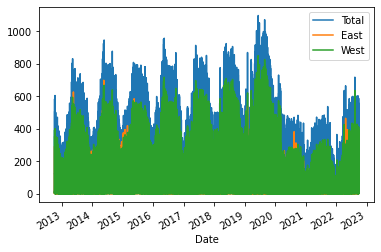

In [26]:
data2.plot()

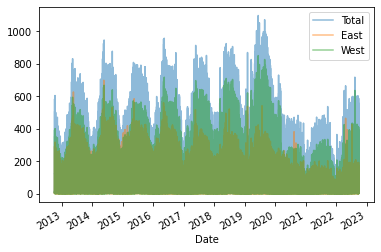

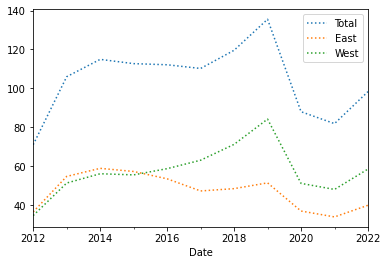

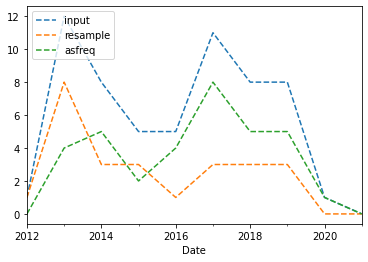

In [27]:
data2.plot(alpha=0.5, style='-')
data2.resample('BA').mean().plot(style=':')
data2.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],loc='upper left')


#### Time-shifts (shift() and tshift()

In [28]:
shift1=data2.shift(2, axis = 0)
shift1.head()

,Total,East,West
Date,,,
2022-08-01 00:00:00,NaN,NaN,NaN
2022-08-01 01:00:00,NaN,NaN,NaN
2022-08-01 02:00:00,23.0,7.0,16.0
2022-08-01 03:00:00,12.0,5.0,7.0
2022-08-01 04:00:00,3.0,0.0,3.0


In [29]:
shift2=data2.shift(-2, axis = 0)
shift1.head()

,Total,East,West
Date,,,
2022-08-01 00:00:00,NaN,NaN,NaN
2022-08-01 01:00:00,NaN,NaN,NaN
2022-08-01 02:00:00,23.0,7.0,16.0
2022-08-01 03:00:00,12.0,5.0,7.0
2022-08-01 04:00:00,3.0,0.0,3.0


In [30]:
index_ = pd.date_range('2007-11-05', periods = 87600, freq ='H')
data2.index = index_
result = data2.tshift(freq = '5H')
print(result)


                     Total  East   West
2007-11-05 05:00:00   23.0   7.0   16.0
2007-11-05 06:00:00   12.0   5.0    7.0
2007-11-05 07:00:00    3.0   0.0    3.0
2007-11-05 08:00:00    5.0   2.0    3.0
2007-11-05 09:00:00   10.0   2.0    8.0
...                    ...   ...    ...
2017-11-02 00:00:00  168.0  57.0  111.0
2017-11-02 01:00:00   73.0  33.0   40.0
2017-11-02 02:00:00   69.0  30.0   39.0
2017-11-02 03:00:00   51.0  10.0   41.0
2017-11-02 04:00:00   59.0  22.0   37.0

[87600 rows x 3 columns]


<ipython-input-30-13919155c163>:3: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  result = data2.tshift(freq = '5H')


### Rolling Windows

In [31]:
data_Rolling = pd.read_csv("/content/Fremont_Bridge_Bicycle_Counter (1).csv", index_col='Date', parse_dates=True)
data_Rolling = data2.reset_index()
data_Rolling

,index,Total,East,West
0,2007-11-05 00:00:00,23.0,7.0,16.0
1,2007-11-05 01:00:00,12.0,5.0,7.0
2,2007-11-05 02:00:00,3.0,0.0,3.0
3,2007-11-05 03:00:00,5.0,2.0,3.0
4,2007-11-05 04:00:00,10.0,2.0,8.0
...,...,...,...,...
87595,2017-11-01 19:00:00,168.0,57.0,111.0
87596,2017-11-01 20:00:00,73.0,33.0,40.0
87597,2017-11-01 21:00:00,69.0,30.0,39.0
87598,2017-11-01 22:00:00,51.0,10.0,41.0


In [32]:
data_Rolling.rolling(window=2).mean()

,Total,East,West
0,NaN,NaN,NaN
1,17.5,6.0,11.5
2,7.5,2.5,5.0
3,4.0,1.0,3.0
4,7.5,2.0,5.5
...,...,...,...
87595,217.0,75.5,141.5
87596,120.5,45.0,75.5
87597,71.0,31.5,39.5
87598,60.0,20.0,40.0


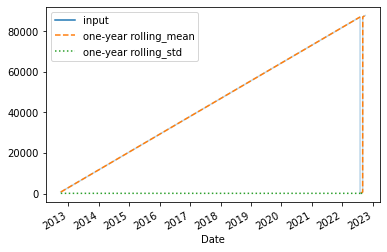

In [33]:
rolling = data_s.rolling(365, center=True)
dat = pd.DataFrame({'input': data_s,
'one-year rolling_mean': rolling.mean(),
'one-year rolling_std': rolling.std()})
ax = dat.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)


#### Visualize the data

In [34]:
data1 = pd.read_csv("/content/Fremont_Bridge_Bicycle_Counter (1).csv", index_col='Date', parse_dates=True)
data1.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0


In [35]:
data1.columns = ['Total','East', 'West']


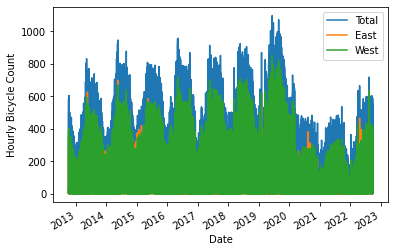

In [36]:
data1.plot()
plt.ylabel('Hourly Bicycle Count');

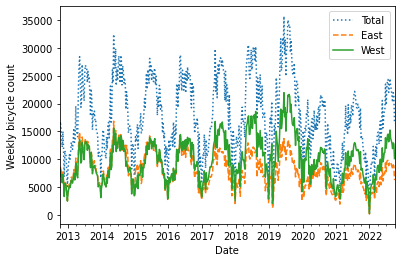

In [37]:
weekly = data1.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');


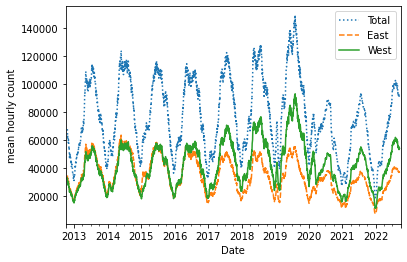

In [38]:
daily = data1.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

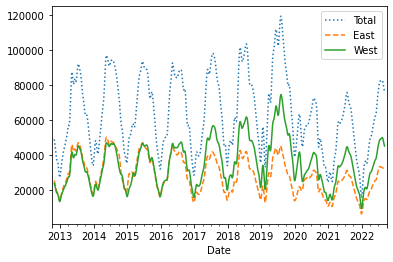

In [39]:
daily.rolling(50, center=True,
win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);


## C. Classifier

### Q4

In [40]:
Kidney = pd.read_csv("/content/ckd (1).csv")
Kidney

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [41]:
Kidney_sub = Kidney[['hemo','bgr','classification']]
Kidney_sub

,hemo,bgr,classification
0,15.4,121.0,ckd
1,11.3,NaN,ckd
2,9.6,423.0,ckd
3,11.2,117.0,ckd
4,11.6,106.0,ckd
...,...,...,...
395,15.7,140.0,notckd
396,16.5,75.0,notckd
397,15.8,100.0,notckd
398,14.2,114.0,notckd


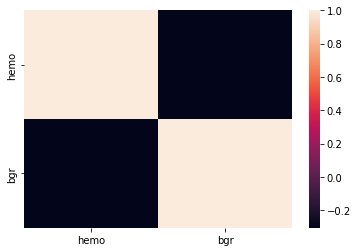

In [42]:
kcorr = Kidney_sub.corr()
sns.heatmap(kcorr)

### Data Cleaning

In [43]:
Kidney_sub.isna().sum()

hemo              52
bgr               44
classification     0
dtype: int64

In [44]:
Kidney_sub.fillna(method='bfill',inplace=True)
Kidney_sub.isna().sum()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


hemo              0
bgr               0
classification    0
dtype: int64

### Data preprocessing

In [45]:
Kidney_sub.describe(include=['object'])

,classification
count,400
unique,3
top,ckd
freq,248


In [46]:
classification = np.array(Kidney_sub['classification'])

In [47]:
for i in range(len(classification)):
    if classification[i]=='ckd\t':
        classification[i]='ckd'

In [48]:
Kidney_sub['classification']=classification

<ipython-input-48-fde1b3970691>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kidney_sub['classification']=classification


In [49]:
Kidney_sub.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [50]:
encoder = LabelEncoder()
minmax = MinMaxScaler()

In [51]:
Kidney_sub['classification']=encoder.fit_transform(Kidney_sub['classification'])

<ipython-input-51-e94d4dd42a90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kidney_sub['classification']=encoder.fit_transform(Kidney_sub['classification'])


In [52]:
Kidney_sub

,hemo,bgr,classification
0,15.4,121.0,0
1,11.3,423.0,0
2,9.6,423.0,0
3,11.2,117.0,0
4,11.6,106.0,0
...,...,...,...
395,15.7,140.0,1
396,16.5,75.0,1
397,15.8,100.0,1
398,14.2,114.0,1


In [53]:
Kidney_sub.describe()

,hemo,bgr,classification
count,400.000000,400.000000,400.000000
mean,12.388500,147.585000,0.375000
std,2.865265,79.444928,0.484729
min,3.100000,22.000000,0.000000
25%,10.400000,99.000000,0.000000
50%,12.500000,120.000000,0.000000
75%,14.800000,163.500000,1.000000
max,17.800000,490.000000,1.000000


In [54]:
cols = Kidney_sub.columns
cols

Index(['hemo', 'bgr', 'classification'], dtype='object')

In [55]:
for i in cols:
    Kidney_sub[i]=minmax.fit_transform(Kidney_sub[[i]])

<ipython-input-55-7906f0966621>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kidney_sub[i]=minmax.fit_transform(Kidney_sub[[i]])
<ipython-input-55-7906f0966621>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kidney_sub[i]=minmax.fit_transform(Kidney_sub[[i]])
<ipython-input-55-7906f0966621>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

### train test split

In [56]:
y = Kidney_sub.pop('classification') 

In [57]:
X = Kidney_sub

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

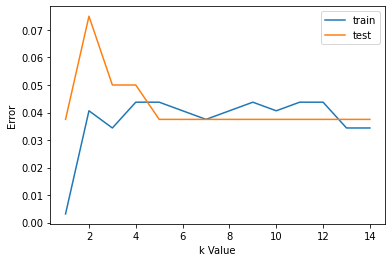

In [59]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_predict1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_predict1))
    y_predict2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_predict2))

plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [60]:
tree = DecisionTreeClassifier(random_state=42,max_leaf_nodes=7,min_samples_leaf=13)
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC()

In [61]:
#knn trained model
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [62]:
#decision tree trained model
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf=13, random_state=42)

In [63]:
#svc trained model
svc.fit(X_train,y_train)

SVC()

In [64]:
knn_pred = knn.predict(X_test)
tree_pred = tree.predict(X_test)
svc_pred = svc.predict(X_test)

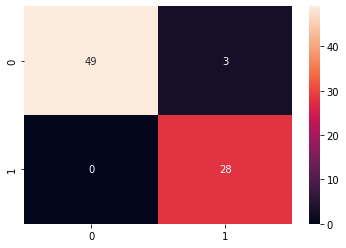

In [65]:
knn_conf = confusion_matrix(y_test,knn_pred)
sns.heatmap(knn_conf,cbar=True,annot=True)

In [66]:
print('The confusion matrix for KNN is :')
print(confusion_matrix(y_test,knn_pred))

The confusion matrix for KNN is :
[[49  3]
 [ 0 28]]


In [67]:
knn_acc = accuracy_score(y_test,knn_pred)
print(f'Accuracy score : {knn_acc}')

Accuracy score : 0.9625


In [68]:
tree_acc = accuracy_score(y_test,tree_pred)
print(f'Accuracy score : {tree_acc}')

Accuracy score : 0.95


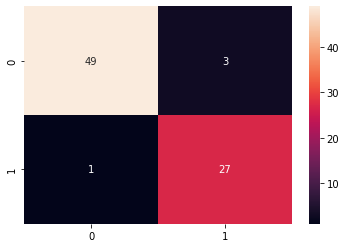

In [69]:
tree_conf = confusion_matrix(y_test,tree_pred)
sns.heatmap(tree_conf,cbar=True,annot=True)


In [70]:
print('The confusion matrix for decision tree is :')
print(confusion_matrix(y_test,tree_pred))

The confusion matrix for decision tree is :
[[49  3]
 [ 1 27]]


In [71]:
svc_acc = accuracy_score(y_test,svc_pred)
print(f'Accuracy score : {svc_acc}')

Accuracy score : 0.95


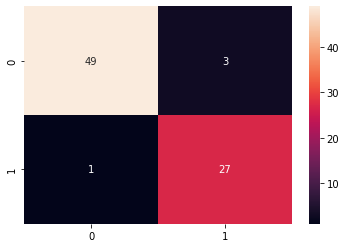

In [72]:
svc_conf = confusion_matrix(y_test,svc_pred)
sns.heatmap(svc_conf,cbar=True,annot=True)

In [73]:
print('The confusion matrix for SVC is :')
print(confusion_matrix(y_test,svc_pred))

The confusion matrix for SVC is :
[[49  3]
 [ 1 27]]


####    Alice has Haemoglobin 0 and Glucose levels 1.1 standard deviations above average, find if Alice is likely to have CKD

Given that Alice has heamoglobin 0 std's above average and 1.1 std's above average
so heamoglobin is (0*std)+(mean(heamoglobin)
and glucose is (1.1*std)+mean(glucose)

In [74]:
hem = np.array(Kidney_sub['hemo'])
glu = np.array(Kidney_sub['bgr'])

In [75]:
s_h = np.std(hem)
g_h = np.std(glu)
s_m = np.mean(hem)
g_m = np.mean(glu)

In [76]:
ali_h = (0*s_h)+s_m
ali_g = (1.1*g_h)+g_m
alice = pd.DataFrame({
    'hemo':[ali_h],
    'bgr':[ali_g]
})
alice

,hemo,bgr
0,0.631871,0.45484


### Now let us predict if alice has the Chronic disease or not

In [77]:
ali_knn = knn.predict(alice)
ali_dtc = tree.predict(alice)
ali_svc = svc.predict(alice)

In [78]:
print(f'Prediction of disease in KNN : {ali_knn}')
print(f'Prediction of disease in decision tree : {ali_dtc}')
print(f'Prediction of disease in SVC : {ali_svc}')

Prediction of disease in KNN : [0.]
Prediction of disease in decision tree : [0.]
Prediction of disease in SVC : [0.]


From the above predictions it is clear that Alice have tha disease beacuse all the predictions are 0
##### So alice have the disease as 0 ---CKD 1--- NOTCKD

### Q 5

##### Prepare a  classifier model  for wine dataset – wine.csv.

In [79]:
wine = pd.read_csv("/content/Wine (1).csv")

In [80]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [81]:
cols = wine.columns
len(cols)

14

In [82]:
wine.isna().any()

Alcohol                 False
Malic_Acid              False
Ash                     False
Ash_Alcanity            False
Magnesium               False
Total_Phenols           False
Flavanoids              False
Nonflavanoid_Phenols    False
Proanthocyanins         False
Color_Intensity         False
Hue                     False
OD280                   False
Proline                 False
Customer_Segment        False
dtype: bool

In [83]:
for i in cols[:12]:
    wine[i]= minmax.fit_transform(wine[[i]])
wine['Customer_Segment']=encoder.fit_transform(wine[['Customer_Segment']])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### We dont have any missing data so we can directly go for scaling

In [84]:
wineX = wine
winey = wine.pop('Customer_Segment')


In [85]:
winey.unique()

array([0, 1, 2])

In [86]:
X_wtrain,X_wtest,y_wtrain,y_wtest = train_test_split(wineX,winey,test_size=0.3)

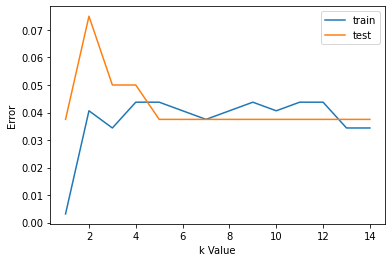

In [87]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_predict1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_predict1))
    y_predict2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_predict2))

plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [88]:
knn_wine= KNeighborsClassifier(n_neighbors=5)

In [89]:
knn_wine.fit(X_wtrain,y_wtrain)

KNeighborsClassifier()

In [90]:
knn_wine_pred = knn_wine.predict(X_wtest)

In [91]:
knn_wine_acc = accuracy_score(y_wtest,knn_wine_pred)
print(f'The accuuracy of the model is {knn_wine_acc}')

The accuuracy of the model is 0.7037037037037037


In [92]:
knn_wine_mat = confusion_matrix(y_wtest,knn_wine_pred)

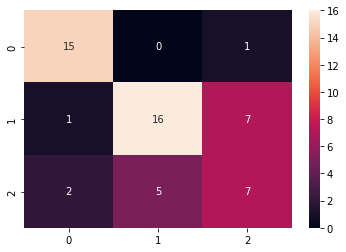

In [93]:
sns.heatmap(knn_wine_mat,annot=True,cbar = True)

In [94]:
print('Confusion matrix is : ')
print(confusion_matrix(y_wtest,knn_wine_pred))

Confusion matrix is : 
[[15  0  1]
 [ 1 16  7]
 [ 2  5  7]]


### Decission Tree

In [95]:
tree.fit(X_wtrain,y_wtrain)

DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf=13, random_state=42)

In [96]:
tree_wine_pred = tree.predict(X_wtest)

In [97]:
tree_wine_acc = accuracy_score(y_wtest,tree_wine_pred)
print(f'The accuuracy of the model is {tree_wine_acc}')

The accuuracy of the model is 0.8333333333333334


In [98]:
print('Confusion matrix is : ')
print(confusion_matrix(y_wtest,tree_wine_pred))

Confusion matrix is : 
[[16  0  0]
 [ 8 15  1]
 [ 0  0 14]]


### SVC

In [99]:
svc.fit(X_wtrain,y_wtrain)
svc_wine_pred = svc.predict(X_wtest)

In [100]:
svc_wine_acc = accuracy_score(y_wtest,svc_wine_pred)
print(f'The accuuracy of the model is {svc_wine_acc}')

The accuuracy of the model is 0.7037037037037037


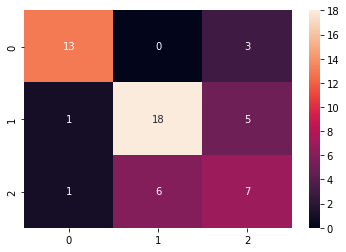

In [101]:
svc_wine_mat = confusion_matrix(y_wtest,svc_wine_pred)
sns.heatmap(svc_wine_mat,annot=True,cbar = True)

In [102]:
print('Confusion matrix is : ')
print(confusion_matrix(y_wtest,svc_wine_pred))

Confusion matrix is : 
[[13  0  3]
 [ 1 18  5]
 [ 1  6  7]]


#### Q6

In [103]:
data=pd.read_csv("https://raw.githubusercontent.com/Suji04/ML_from_Scratch/master/Breast_cancer_data.csv")

df=pd.DataFrame(data)

df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [104]:
from sklearn.model_selection import train_test_split

x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


### KNN Classifier

In [105]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_predict_1 = knn.predict(x_test)
y_predict_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

### Decision Tree 

In [106]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(x_train,y_train)

y_predict_2 = model.predict(x_test)

print(y_predict_2)



[1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1
 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0
 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1
 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1]


### SVC

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_predict_3 = rf.predict(x_test)
y_predict_3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

### Accuracies

In [108]:
from sklearn import metrics
print("Accuracy of K Neartest Neighbours : ",end=" ")
print(metrics.accuracy_score(y_predict_1,y_test))

print("Accuracy of Decision Tress : ",end=" ")
print(metrics.accuracy_score(y_predict_2,y_test))

print("Accuracy of Random Forest : ",end=" ")
print(metrics.accuracy_score(y_predict_3,y_test))



Accuracy of K Neartest Neighbours :  0.8947368421052632
Accuracy of Decision Tress :  0.8947368421052632
Accuracy of Random Forest :  0.9122807017543859


### KNN Cross Validation

In [109]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits = 3)
tr=KNeighborsClassifier(n_neighbors=5)
tr1 = DecisionTreeClassifier()
tr2=RandomForestClassifier(n_estimators=100)

tr.fit(x_train, y_train)
results = model_selection.cross_val_score(tr, x_train, y_train, cv = kfold)
print("results for KNN: ")
print(results)
print("")


tr1.fit(x_train, y_train)
results1 = model_selection.cross_val_score(tr1, x_train, y_train, cv = kfold)
print("results for Decision Tree: ")
print(results1)
print("")


tr2.fit(x_train, y_train)
results2 = model_selection.cross_val_score(tr2, x_train, y_train, cv = kfold)
print("results for Random Forest: ")
print(results2)
print("")


results for KNN: 
[0.86466165 0.84210526 0.86363636]

results for Decision Tree: 
[0.86466165 0.85714286 0.90909091]

results for Random Forest: 
[0.89473684 0.88721805 0.93181818]



In [110]:
val=0
val1=0
val2=0
for i in range(3):
    val+=results[i]
    val1+=results1[i]
    val2+=results2[i]

print(val/3)
print(val1/3)
print(val2/3)


0.8568010936431989
0.8769651401230348
0.9045910230120756


### Random forest is the best classifier

## D. Regression

### Q7

In [111]:
home= pd.read_csv('/content/house (1).csv')

In [112]:
obj_colums = home.describe(include='object').columns

In [113]:
home.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [114]:
obj_colums

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [115]:
for i in obj_colums:
    home[i]=encoder.fit_transform(home[[i]])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
all_cols = home.columns
all_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [117]:
for i in all_cols[1:]:
    home[i]=minmax.fit_transform(home[[i]])

In [118]:
home.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,0.240587,0.393028,0.095413,0.268502,0.858716,0.177982,0.350459,0.045872,0.315596,0.231193,0.234862,0.534862
std,1.870440e+06,0.149151,0.147613,0.167490,0.289164,0.348635,0.382849,0.477552,0.209399,0.465180,0.287195,0.424302,0.380686
min,1.750000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,0.134021,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,0.202749,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,5.740000e+06,0.323711,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000
max,1.330000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [119]:
home

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,12250000,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,12250000,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,12215000,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0
4,11410000,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,1.0
541,1767150,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,1750000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
543,1750000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [120]:
y_home= home.pop('price')
X_home = home

In [121]:
Xh_train,Xh_test,yh_train,yh_test = train_test_split(X_home,y_home,test_size=0.2,random_state=42)

In [122]:
regressor = LinearRegression()
knr = KNeighborsRegressor(n_neighbors=7)

In [123]:
regressor.fit(Xh_train,yh_train)
home_pred = regressor.predict(Xh_test)

In [124]:
knr.fit(Xh_train,yh_train)
khome_pred = knr.predict(Xh_test)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


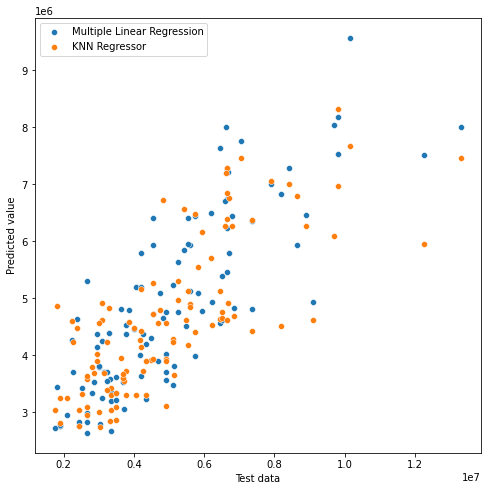

In [125]:
plt.figure(figsize=(8,8))
sns.scatterplot(yh_test,home_pred)
sns.scatterplot(yh_test,khome_pred)
plt.legend(['Multiple Linear Regression','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


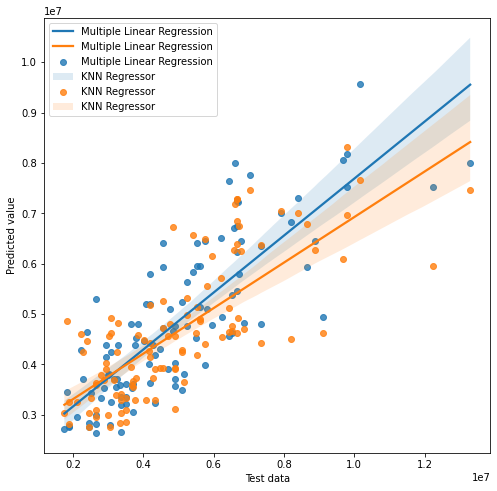

In [126]:
plt.figure(figsize=(8,8))
sns.regplot(yh_test,home_pred)
sns.regplot(yh_test,khome_pred)
plt.legend(['Multiple Linear Regression','Multiple Linear Regression','Multiple Linear Regression','KNN Regressor','KNN Regressor','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()

In [127]:
rmae = mean_absolute_error(yh_test,home_pred)
rmse = mean_squared_error(yh_test,home_pred)
rr2 = r2_score(yh_test,home_pred)

In [128]:
kmae = mean_absolute_error(yh_test,khome_pred)
kmse = mean_squared_error(yh_test,khome_pred)
kr2 = r2_score(yh_test,khome_pred)

In [129]:
metrics = {'MAE':[rmae,kmae],'MSE':[rmse,kmse],'R2 score':[rr2,kr2]}
metrics_df = pd.DataFrame(metrics)
metrics_df.index=['Multiple Linear Regression','KNN Regressor']
metrics_df

,MAE,MSE,R2 score
Multiple Linear Regression,9.796797e+05,1.771751e+12,0.649475
KNN Regressor,1.089523e+06,2.402156e+12,0.524756



MAE is better for KNN regressor but MSE and R2 score are better for Multiple Regression.

###### So in this case Multiple Regression is better

#### Q8

Implement a logistic regression model – employ scikit-learn library functions. 

In [130]:
from sklearn.datasets import fetch_openml
titanic = fetch_openml('titanic', version=1, as_frame=True)
titanic_df = titanic['data']
titanic_df['survived'] = titanic['target']

In [131]:
titanic_df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None,0
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None,0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None,0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None,0


In [132]:
#name is definetly not needed so remove it
titanic_df.drop(['cabin', 'boat', 'body'], axis=1, inplace=True)
 
# remove less interesting features
titanic_df.drop(['name','ticket','home.dest'], axis=1, inplace=True)

In [133]:
titanic_df

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1.0,female,29.0000,0.0,0.0,211.3375,S,1
1,1.0,male,0.9167,1.0,2.0,151.5500,S,1
2,1.0,female,2.0000,1.0,2.0,151.5500,S,0
3,1.0,male,30.0000,1.0,2.0,151.5500,S,0
4,1.0,female,25.0000,1.0,2.0,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3.0,female,14.5000,1.0,0.0,14.4542,C,0
1305,3.0,female,NaN,1.0,0.0,14.4542,C,0
1306,3.0,male,26.5000,0.0,0.0,7.2250,C,0
1307,3.0,male,27.0000,0.0,0.0,7.2250,C,0


In [134]:
titanic_df['sex']=encoder.fit_transform(titanic_df[['sex']])
titanic_df['embarked']=encoder.fit_transform(titanic_df[['embarked']])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [135]:
for i in titanic_df.columns[:-1]:
    titanic_df[i]=minmax.fit_transform(titanic_df[[i]])

In [136]:
titanic_df['survived'].unique()

['1', '0']
Categories (2, object): ['0', '1']

In [137]:
titanic_df.isna().sum()

pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      0
survived      0
dtype: int64

In [138]:
age = titanic_df['age']
ages = [i for i in age if (i>=0 and i<=1)]

In [139]:
avg_age = np.array(ages).mean()
for i in range(len(age)):
    if (age[i]>=0 and age[i]<=1):
        pass
    else:
        age[i]=avg_age

<ipython-input-139-6d57e88afded>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[i]=avg_age


In [140]:
titanic_df['age']=age

In [141]:
titanic_df.dropna(inplace=True)

In [142]:
y_titanic= titanic_df.pop('survived')
X_titanic = titanic_df

In [143]:
Xt_train,Xt_test,yt_train,yt_test = train_test_split(X_titanic,y_titanic,test_size=0.2)

In [144]:
from sklearn.linear_model import LogisticRegression

log_regressor = LogisticRegression()

In [145]:
log_regressor.fit(Xt_train,yt_train)

LogisticRegression()

In [146]:
titanic_pred = log_regressor.predict(Xt_test)

In [147]:
log_acc=accuracy_score(yt_test,titanic_pred)
print(f'Accuracy of the model is {log_acc}')

Accuracy of the model is 0.7862595419847328


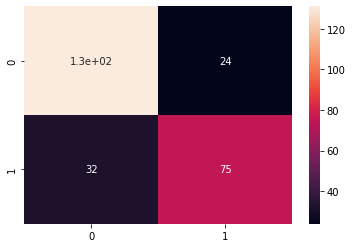

In [148]:
log_conf = confusion_matrix(yt_test,titanic_pred)
sns.heatmap(log_conf,annot=True,cbar=True)

In [149]:
print('The confusion matrix is : ')
print(confusion_matrix(yt_test,titanic_pred))

The confusion matrix is : 
[[131  24]
 [ 32  75]]
